#                                                 Big Mart Sales
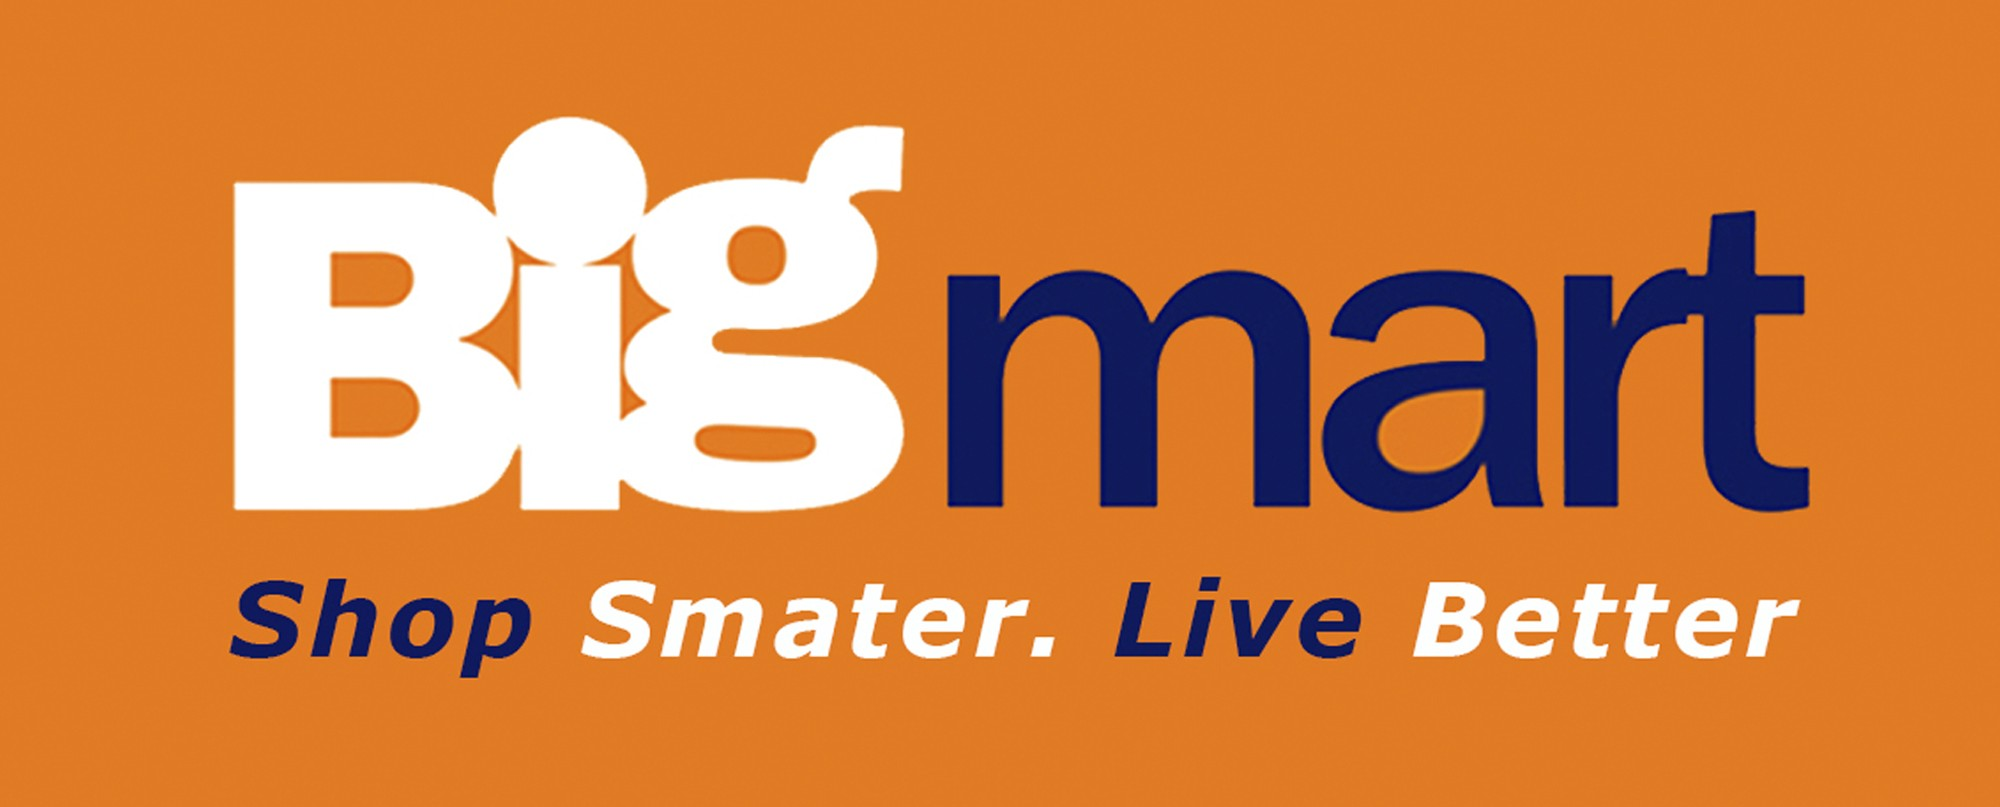

# INTRTODUCTION:

Customer Satisfaction and keeping up with the demand for products is very important for any store to survive in the market and to compete with other stores. And these two can only be achieved when you have a future demand figure for coming up with new plans for a flourishing business with an increased population, the number of stores and shopping malls is also increasing creating competition between different enterprises for bigger sales and popularity. Along with grocery shops and stores, even enterprises need an analysis to check about the patterns and predict future sales. 

Do the sales of “Bigmart” Increase or Decrease according the type of Item? Did the sales depend on the modulation of cost and size of an item? These are some of the questions that hinders when one look at the dataset. 

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("D:/EDA Project/BigMart.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


* Item_Identifier: Unique product ID

* Item_Weight: Weight of product

* Item_Fat_Content: Whether the product is low fat or not

* Item_Visibility: The % of total display area of all products in a store allocated to the particular product

* Item_Type: The category to which the product belongs

* Item_MRP: Maximum Retail Price (list price) of the product

* Outlet_Identifier: Unique store ID

* Outlet_Establishment_Year: The year in which store was established

* Outlet_Size: The size of the store in terms of ground area covered

* Outlet_Location_Type: The type of city in which the store is located

* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [7]:
df.shape

(8523, 12)

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##  Data Cleaning 

Cleaning of Dataset is important for data analysis as it may contain null values, duplicate values and outliers inside it.
These need to be rectified and replaced with appropriate values accordingly.

In [12]:
# Finding the number of null values present in each attribute of the table

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# Let us find the percentage of null values in the table

df.isnull().sum()/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

From here we can easily know the percentage of null values found in the dataset. Only "Item_weight" and "Outlet_size" columns in the dataset have null values and we need to clean and enter values to it

In [14]:
# The unique values in Outlet_Size column 

df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
# The total count of each attribute in the column 

df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
# Mode of the column Outlet_Size is found

print(df.Outlet_Size.mode()[0])

Medium


Mode of the column Outlet_Size is "Medium"

In [17]:
# Null values in the Outlet_Size column is replaced with mode('most occuring element') of the column - "Medium"

df.Outlet_Size = df.Outlet_Size.fillna(df.Outlet_Size.mode()[0])

In [18]:
df.isnull().sum().Outlet_Size

0

Here the null values in the column are replaced by Medium and now the null values are 0

In [19]:
# The number of null values in the Item_weight column

df.isnull().sum().Item_Weight

1463

In [20]:
print(df.Item_Weight.mean())

12.857645184136183


In [21]:
# Null values in the Item_Weight column is replaced with mean of the column  

df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [22]:
df.isnull().sum().Item_Weight

0

Here we can clearly observe that the null values have been replaced by the mean and the total null values now is 0

#### Now We have imputed the missing values let's remove outliers


In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

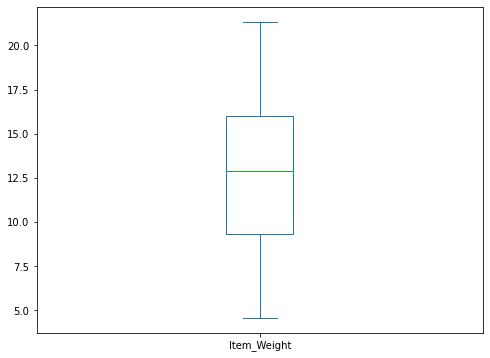

In [24]:
#how to know if there are out liers or not we will use box plot 
df['Item_Weight'].plot(kind='box',figsize=(8,6))

<AxesSubplot:>

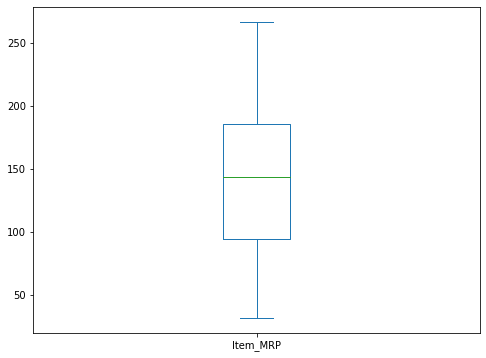

In [25]:
df['Item_MRP'].plot(kind='box',figsize=(8,6))

<AxesSubplot:>

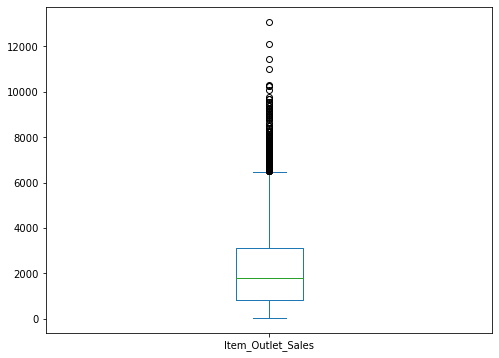

In [26]:
df['Item_Outlet_Sales'].plot(kind='box',figsize=(8,6))

The above boxplot suggests that there might be some outliers in the column 'Item_Outlet_Sales' and we need to solve those.

In [27]:
# we will use this way to find the out liers 
Q1,Q3=np.percentile(df['Item_Outlet_Sales'], [25,75])
IQR=Q3-Q1
Upper=Q3+IQR*1.5
Lower=Q1-IQR*1.5
print(Lower,Upper)

-2566.3261 6501.8699


In [28]:
df[df['Item_Outlet_Sales']==Upper]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [29]:
df[df['Item_Outlet_Sales']==Lower]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There are NO outliers in the column 'Item_Outlet_Sales'.

In [30]:
df.drop_duplicates(inplace= True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

The Data in the ' Item_Fat_Content ' column seems to be inconsistent and needs to be made proper.

In [33]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now our data in the column ' Item_Fat_Content ' is made consistent.

In [34]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [35]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [36]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [37]:
df['Outlet_Location_Type'].value_counts() 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [38]:
df['Outlet_Type'].value_counts()   

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

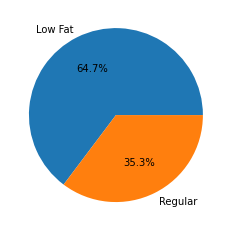

In [39]:
fat = df['Item_Fat_Content'].value_counts()
plt.pie(fat, labels=fat.index, autopct="%.1f%%");

65% of the total products are Low Fat products and 35% are Regular products

<AxesSubplot:>

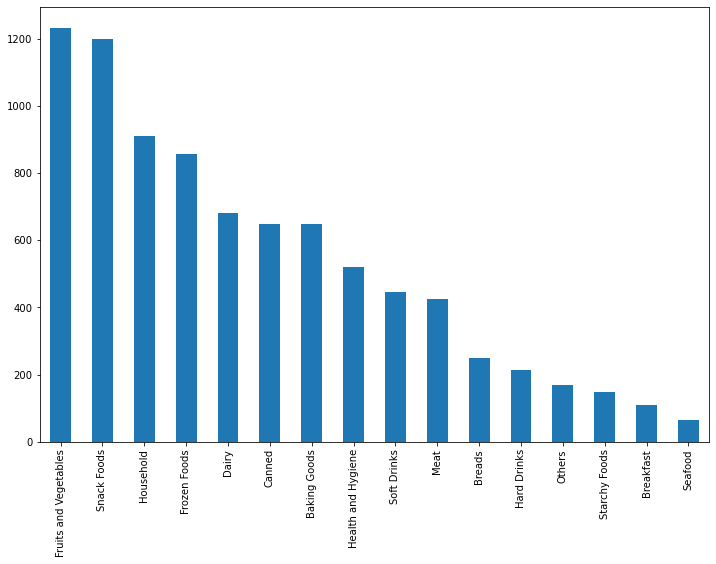

In [40]:
df.Item_Type.value_counts().plot(kind='bar', figsize=(12,8))

Fruits and vegetables,Snack Foods have the maximum number of products in the store.

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 3'), Text(1, 0, 'Tier 2'), Text(2, 0, 'Tier 1')])

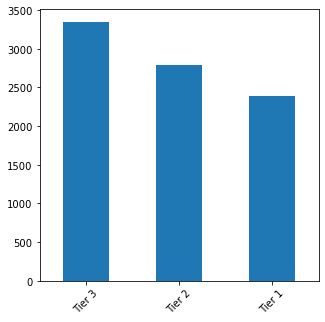

In [41]:
df.Outlet_Location_Type.value_counts().plot(kind='bar', figsize=(5,5))
plt.xticks(rotation = 45)

Maximum number of stores are located in the Tier 3 type of cities.

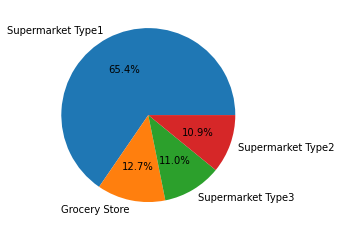

In [42]:
fat = df['Outlet_Type'].value_counts()
plt.pie(fat, labels=fat.index, autopct="%.1f%%");

Maximum number of stores are of Supermarket Type1 stores.

<AxesSubplot:>

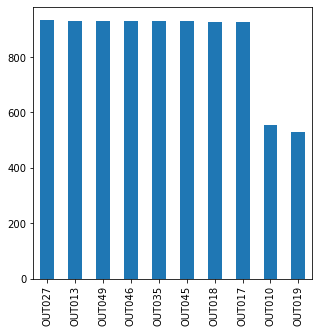

In [43]:
df.Outlet_Identifier.value_counts().plot(kind='bar', figsize=(5,5))

The stores are evenly placed in the cities except for 2 cities.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

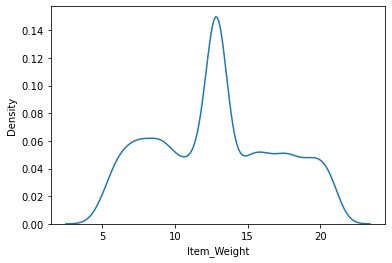

In [44]:
sns.kdeplot(df['Item_Weight'])

The weight of maximum products is placedin between 10 and 15 grams.

<AxesSubplot:xlabel='Item_Visibility'>

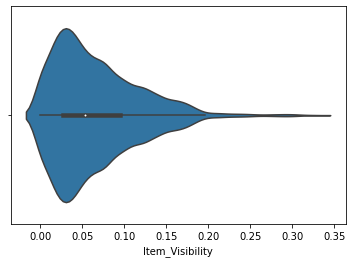

In [45]:
sns.violinplot(x=df["Item_Visibility"])

The Item_Visibility is between 0.00 to 0.35 with a maximum between 0.00 and 0.05 of the entire products in the stores.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

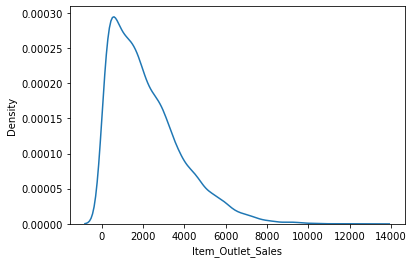

In [46]:
sns.kdeplot(df['Item_Outlet_Sales'])

The Item_Outlet_Sales is between 0 and 12500 and the maximum is between 0 and 2500.

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

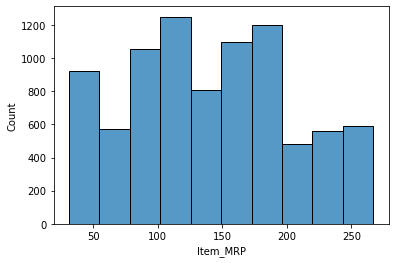

In [47]:
sns.histplot(df.Item_MRP,bins=10)

The cost of the products is between 32 and 267 and maximum number of products cost between 100 and 130.

<AxesSubplot:>

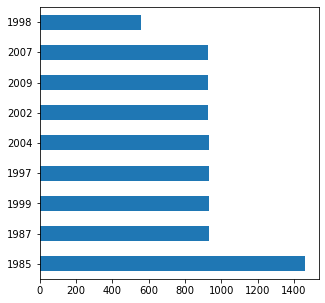

In [48]:
df.Outlet_Establishment_Year.value_counts().plot(kind='barh', figsize=(5,5))

The maximum number of stores are established in the year 1985 and has increased constantly.

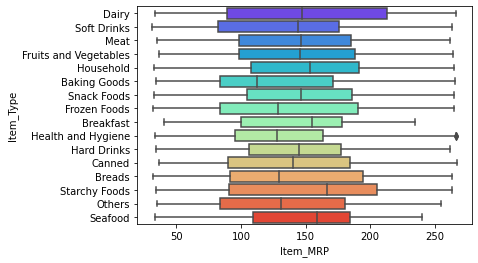

In [49]:
sns.boxplot(y="Item_Type", x="Item_MRP", data=df, palette='rainbow')
plt.show()

Above graph depicts that the Item_MRP for most ofthe products is between 100 and 200.

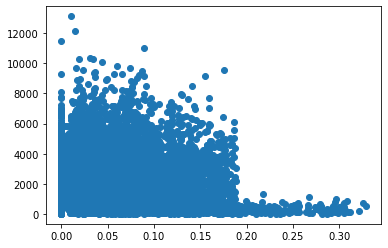

In [50]:
plt.scatter(x = "Item_Visibility",y = "Item_Outlet_Sales",data = df)
plt.show()

* The Sales have been much better when the visibility of the products is between 0.01 to 0.20 than that of more than 0.20.
* Sales has been reduced with the availabilty of the products.

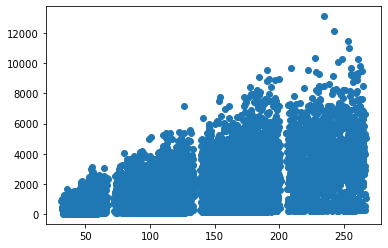

In [51]:
plt.scatter(df.Item_MRP,df.Item_Outlet_Sales)
plt.show()

The Sales of the products have been increased with the increase in MRP.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

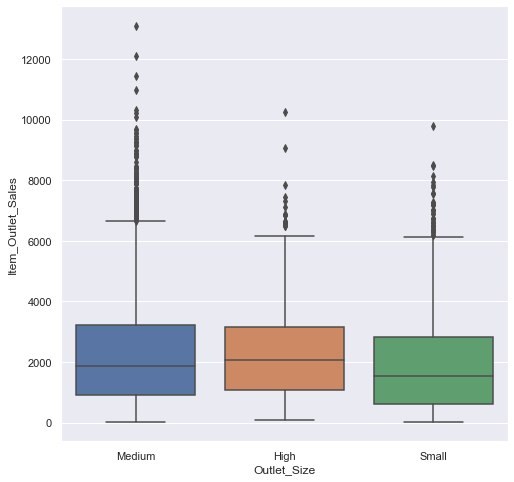

In [65]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

The Sales at the stores are mostly between 1000 and 3000 for all type of stores.

Text(0.5, 1.0, 'Item_Outlet_Sales vs Outlet_Identifier')

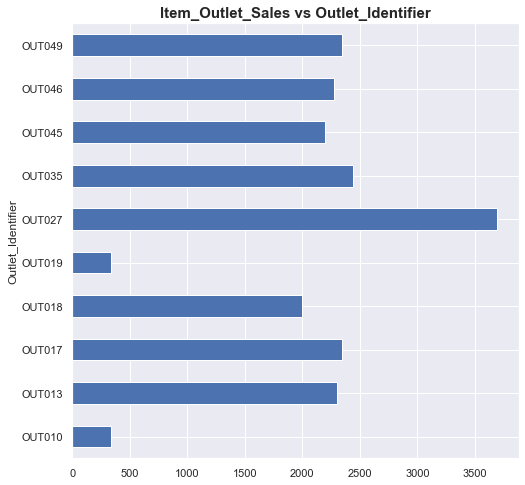

In [66]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.barh()
plt.title('Item_Outlet_Sales vs Outlet_Identifier',fontsize = 15, fontweight = 'bold')

The maximum sales is at the OUT027 store and least at OUT010.

<AxesSubplot:ylabel='Item_Type'>

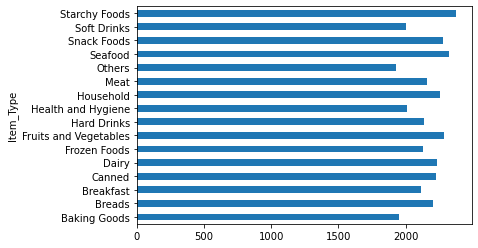

In [7]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.barh()

Sales of different types of prodcuts are same and all add to increase in sales

<AxesSubplot:ylabel='Outlet_Type'>

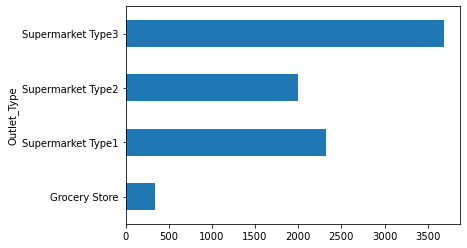

In [54]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.barh()

The above graph shows that the sales are high at the Supermarket Type3 and low at Grocery Store.

<AxesSubplot:ylabel='Outlet_Location_Type'>

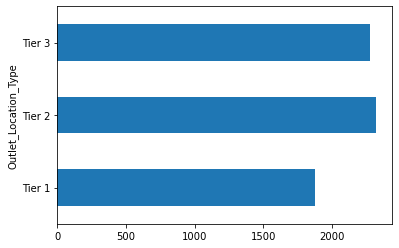

In [9]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.barh()

Tier 2 and Tier 3 location stores have higher sales.

### Numerical Statistics of the columns

In [55]:
df.Item_Weight.describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

* The mean weight of the products is 12.85 grams.
* Minimum weight of the products is 4.55 grams.
* Maximum weight of the products is 21.35 grams.
* The median of the weight of products is also 12.85 grams.

In [56]:
df.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

* The mean visibility of the products is 0.06.
* The minimum visibility of the products is 0.
* The maximum visibility of the products is 0.3

In [57]:
df.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

* The mean MRP of the products is Rs 140.
* The minimum cost of the products is Rs 31.
* The maximum cost of the products is Rs 267.

In [58]:
df.Outlet_Establishment_Year.describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

* 1985 is the minimum year of an Outlet_Establishment.
* 1999 is the median year of an Outlet_Establishment.
* The most recent Outlet_Establishment is in 2009.

In [59]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

* The mean value of the sales of the products is Rs 2181.
* The minimum value of sales of products is Rs 33.
* The maximum value of sales of products is Rs 13086.

# Multivaraiate Analysis

<AxesSubplot:>

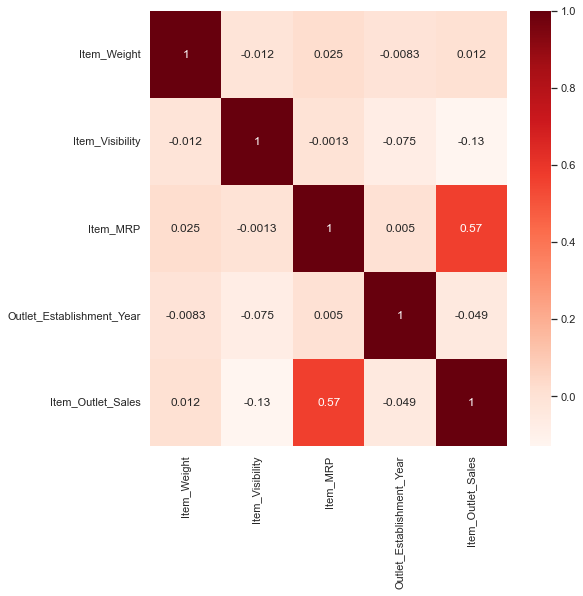

In [70]:
sales = df.corr()
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(sales,annot=True,cmap="Reds")

* Item_MRP and Item_Outlet_Sales are positively correlated. If cost of product increases sales also increases.
* There is a slight positive correlation between Item_MRP and Item_weight.
* Correlation of -0.13 between Item_Visibility and Item_Outlet_Sales is the highest negative correlation.

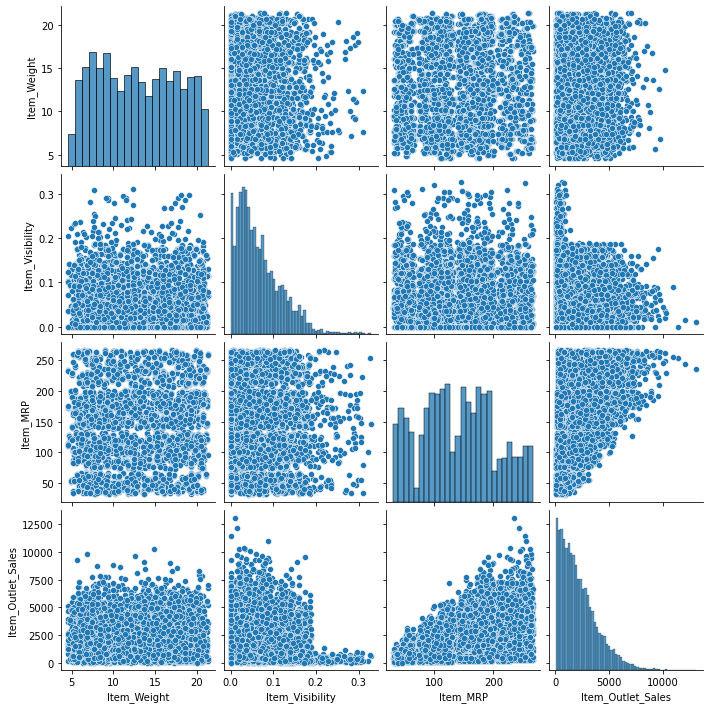

In [11]:
sns.pairplot(df,vars=["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"])
plt.show()

* Item_Outlet_Sales has increased gradually on increase in MRP of a product
* Products that are brought to store are of moderate cost. High-cost products are rarely got into the store.

## Inferences

* Dataset given shows that Item_MRP for most ofthe products is between 100 and 200
* The Sales have been much better when the visibility of the products is between 0.01 to 0.20 than that of more than 0.20.
* Sales has been reduced with the availability of the products.
* The Sales of the products have been increased with the increase in MRP.
* The Sales at the stores are mostly between 1000 and 3000 for all type of stores.
* Supermarket Type3 have higher sales and are lower at Grocery Store.
* Tier 2 and Tier 3 location stores have higher sales.
* The above graph shows that the sales are high at the Supermarket Type3 and low at Grocery Store.

# Analysis and Conclusions

#### Which type of stores gave more sales?

* 'Supermarket Type3' which are 'medium' sized should be established in more areas as it has given more sales and more profits than other type of markets. 

#### What type of products to sell to increase sales?

* Products of more mrp can be bought as it has more sales in different areas of outlets.

#### What type of items to sell in either low fat or high fat?

* Low fat products like biscuits have been the superior over high fat products like oils.

#### Where to locate the stores to get more sales?

* Placing the stores in the areas of Tier 2 and Tier 3 have higher sales and stores could be placed here.

#### How many items should be bought in order to sell?

* Items should be held regularly such that the sales too increases